# Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Data Visualization

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
fashion_test_df.shape

(10000, 785)

In [ ]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype = 'float32')

7.0

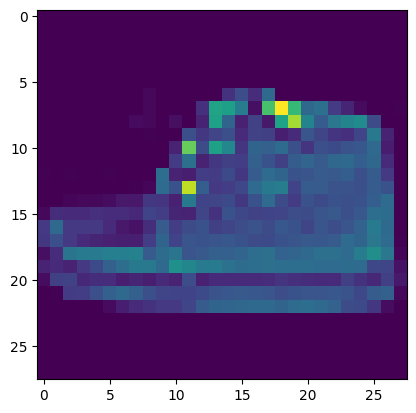

In [ ]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

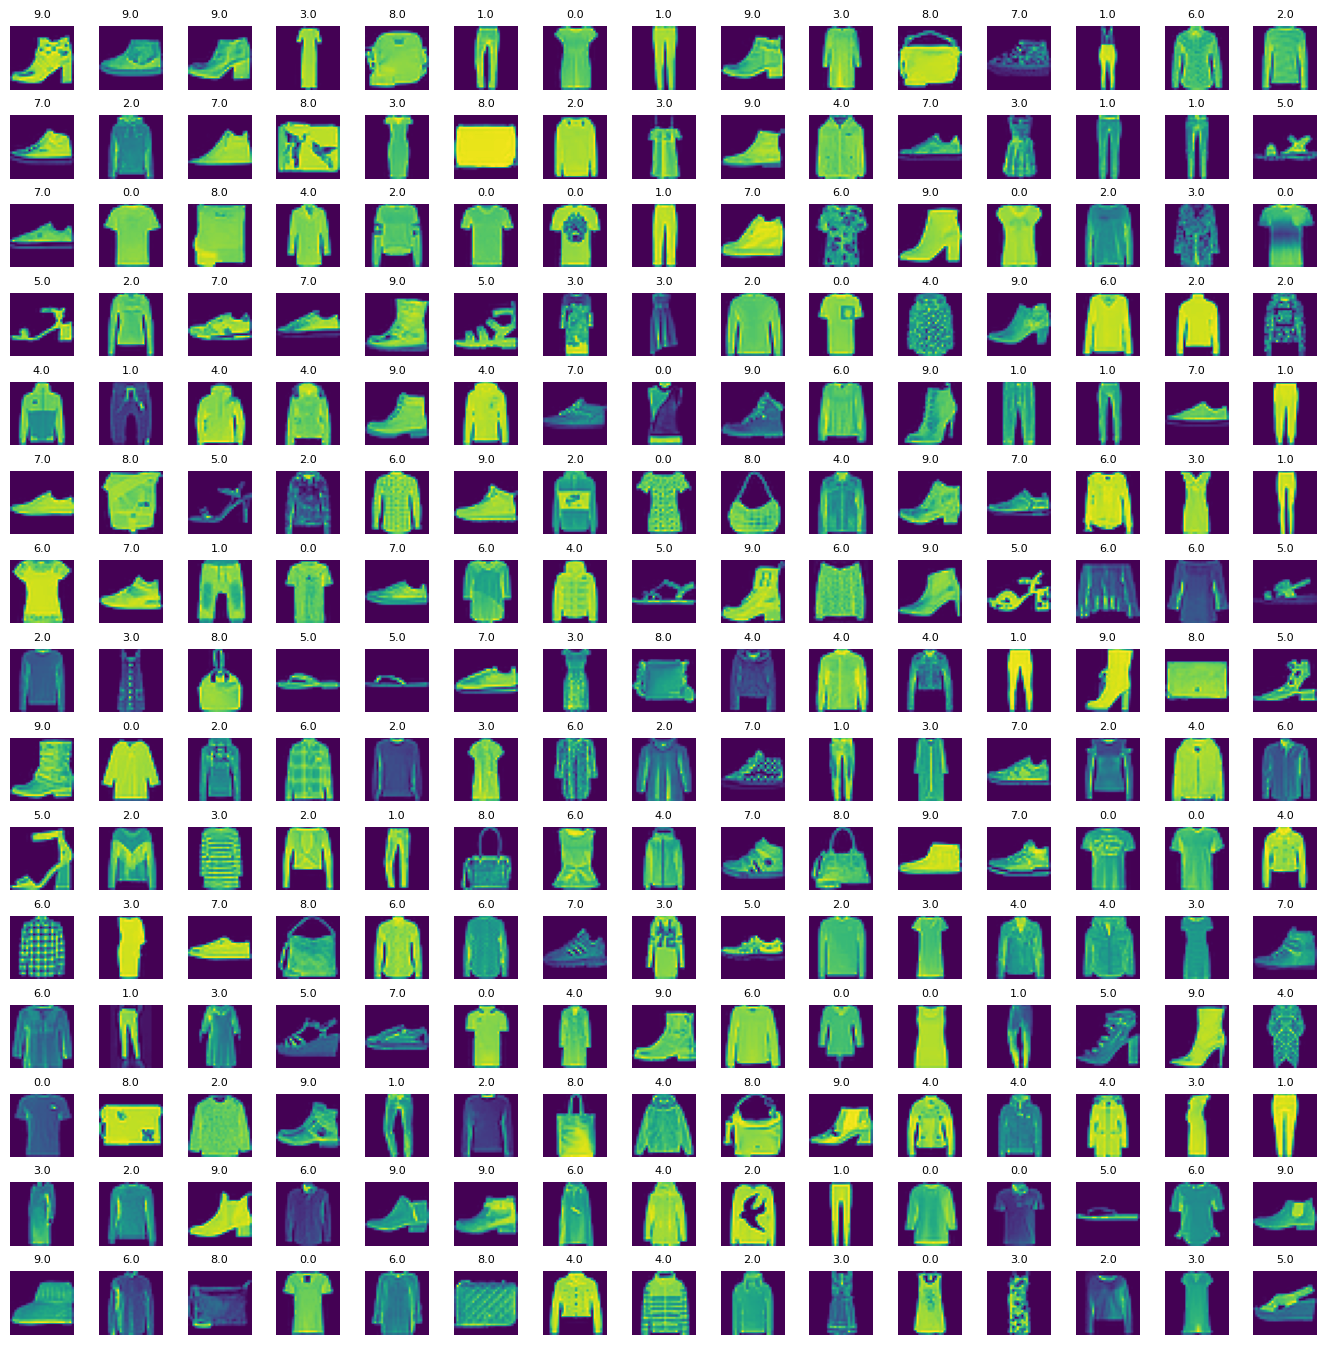

In [ ]:
# trying to plot figures as matrices
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel()     # flatten the 15x15 to 225

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# Model Training

In [ ]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
X_train.shape

(48000, 784)

In [ ]:
y_train.shape

(48000,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [ ]:
X_train.shape

(48000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_validate.shape

(12000, 28, 28, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 30ms/step - loss: 1.2738 - accuracy: 0.5775 - val_loss: 0.7045 - val_accuracy: 0.7488
Epoch 2/50
94/94 [==============================] - 4s 40ms/step - loss: 0.6605 - accuracy: 0.7574 - val_loss: 0.5850 - val_accuracy: 0.7881
Epoch 3/50
94/94 [==============================] - 3s 30ms/step - loss: 0.5813 - accuracy: 0.7864 - val_loss: 0.5343 - val_accuracy: 0.8071
Epoch 4/50
94/94 [==============================] - 3s 30ms/step - loss: 0.5391 - accuracy: 0.8029 - val_loss: 0.5057 - val_accuracy: 0.8171
Epoch 5/50
94/94 [==============================] - 3s 31ms/step - loss: 0.5109 - accuracy: 0.8126 - val_loss: 0.4743 - val_accuracy: 0.8292
Epoch 6/50
94/94 [==============================] - 3s 35ms/step - loss: 0.4921 - accuracy: 0.8209 - val_loss: 0.4632 - val_accuracy: 0.8342
Epoch 7/50
94/94 [==============================] - 3s 31ms/step - loss: 0.4776 - accuracy: 0.8252 - val_loss: 0.4497 - val_accuracy: 0.8382
Epoch 8/50
94

# Evaluating the model

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8806
Test Accuracy : 0.881


In [ ]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=-1)
predicted_classes

313/313 [==============================] - 0s 1ms/step


array([0, 1, 2, ..., 8, 8, 1])

<Axes: >

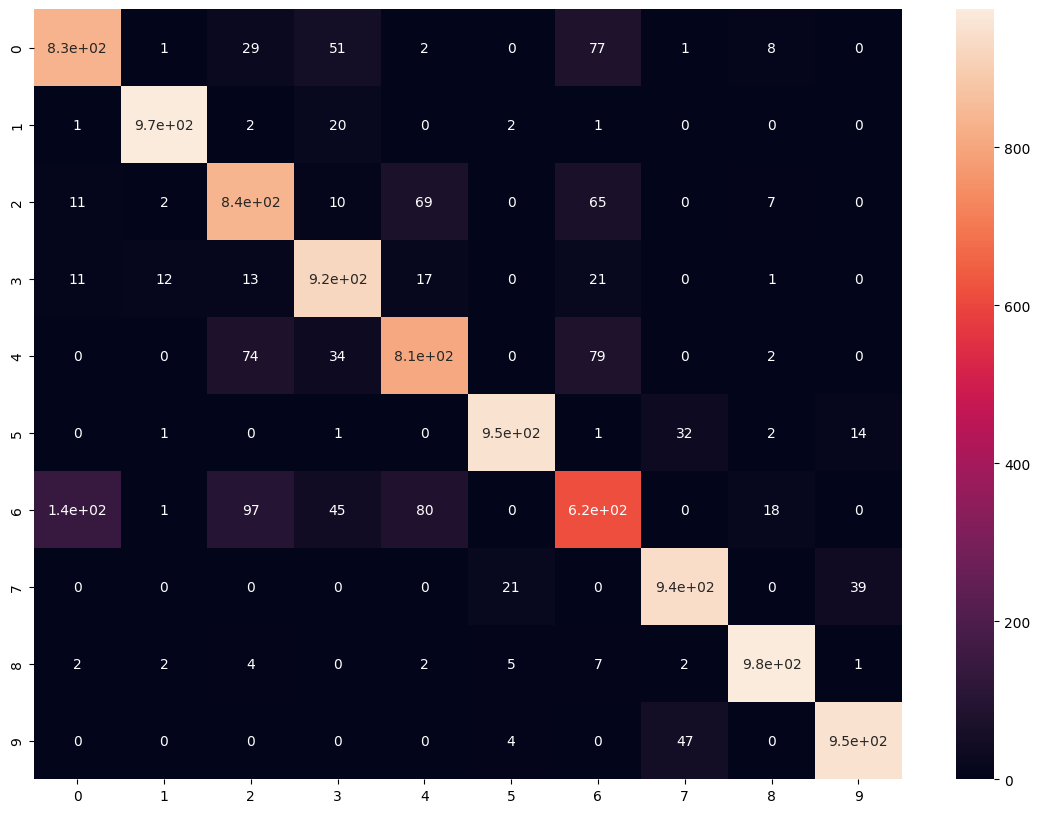

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range (num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.79      0.84      0.81      1000
     Class 3       0.85      0.93      0.89      1000
     Class 4       0.83      0.81      0.82      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.71      0.61      0.66      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

